# INITIAL CLEANING

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('data/source/test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
dtype: int64

## Initial Drop

In [46]:
column_drop = [
                'Ticket',
              ]
df.drop(column_drop, axis=1, inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


## Name Manipulation

In [47]:
import re
RE = re.compile(r", [a-zA-Z]*\.")
#SALLIST = ('Mr', 'Miss', 'Master', 'Mrs')

def name_extract(name):
    match = RE.findall(name)
    try:
        return match[0][2:-1]
    except IndexError:
        return np.NaN
    
df['Name'] = df['Name'].apply(name_extract)
df = pd.concat([df, pd.get_dummies(df['Name'])], axis=1)

In [48]:
column_drop = ['Mr', 'Mrs', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

df.drop(column_drop, axis=1, inplace=True)
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Master,Miss
0,892,3,Mr,male,34.5,0,0,7.8292,NaN,Q,0,0
1,893,3,Mrs,female,47.0,1,0,7.0000,NaN,S,0,0
2,894,2,Mr,male,62.0,0,0,9.6875,NaN,Q,0,0
3,895,3,Mr,male,27.0,0,0,8.6625,NaN,S,0,0
4,896,3,Mrs,female,22.0,1,1,12.2875,NaN,S,0,0
5,897,3,Mr,male,14.0,0,0,9.2250,NaN,S,0,0
6,898,3,Miss,female,30.0,0,0,7.6292,NaN,Q,0,1
7,899,2,Mr,male,26.0,1,1,29.0000,NaN,S,0,0
8,900,3,Mrs,female,18.0,0,0,7.2292,NaN,C,0,0
9,901,3,Mr,male,21.0,2,0,24.1500,NaN,S,0,0


## Cabin Manipulation

In [49]:
cabin_map = lambda x: str(x[0]) if not pd.isnull(x) else np.NaN
df['Cabin'] = df['Cabin'].apply(cabin_map)
df = pd.concat([df, pd.get_dummies(df['Cabin'], prefix='Cabin')], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Master,Miss,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,892,3,Mr,male,34.5,0,0,7.8292,NaN,Q,0,0,0,0,0,0,0,0,0
1,893,3,Mrs,female,47.0,1,0,7.0000,NaN,S,0,0,0,0,0,0,0,0,0
2,894,2,Mr,male,62.0,0,0,9.6875,NaN,Q,0,0,0,0,0,0,0,0,0
3,895,3,Mr,male,27.0,0,0,8.6625,NaN,S,0,0,0,0,0,0,0,0,0
4,896,3,Mrs,female,22.0,1,1,12.2875,NaN,S,0,0,0,0,0,0,0,0,0


## Sex Manipulation

In [50]:
gender_map = lambda x: 1 if str(x) == 'female' else 0
df['Sex'] = df['Sex'].apply(gender_map)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Master,Miss,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,892,3,Mr,0,34.5,0,0,7.8292,NaN,Q,0,0,0,0,0,0,0,0,0
1,893,3,Mrs,1,47.0,1,0,7.0000,NaN,S,0,0,0,0,0,0,0,0,0
2,894,2,Mr,0,62.0,0,0,9.6875,NaN,Q,0,0,0,0,0,0,0,0,0
3,895,3,Mr,0,27.0,0,0,8.6625,NaN,S,0,0,0,0,0,0,0,0,0
4,896,3,Mrs,1,22.0,1,1,12.2875,NaN,S,0,0,0,0,0,0,0,0,0


## Embarked Manipulation

In [51]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Emb')], axis=1)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,892,3,Mr,0,34.5,0,0,7.8292,NaN,Q,...,0,0,0,0,0,0,0,0,1,0
1,893,3,Mrs,1,47.0,1,0,7.0000,NaN,S,...,0,0,0,0,0,0,0,0,0,1
2,894,2,Mr,0,62.0,0,0,9.6875,NaN,Q,...,0,0,0,0,0,0,0,0,1,0
3,895,3,Mr,0,27.0,0,0,8.6625,NaN,S,...,0,0,0,0,0,0,0,0,0,1
4,896,3,Mrs,1,22.0,1,1,12.2875,NaN,S,...,0,0,0,0,0,0,0,0,0,1


## Fare Manipulation

In [52]:
df['Fare_round'] = df['Fare'].apply(np.around)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S,Fare_round
0,892,3,Mr,0,34.5,0,0,7.8292,NaN,Q,...,0,0,0,0,0,0,0,1,0,8.0
1,893,3,Mrs,1,47.0,1,0,7.0000,NaN,S,...,0,0,0,0,0,0,0,0,1,7.0
2,894,2,Mr,0,62.0,0,0,9.6875,NaN,Q,...,0,0,0,0,0,0,0,1,0,10.0
3,895,3,Mr,0,27.0,0,0,8.6625,NaN,S,...,0,0,0,0,0,0,0,0,1,9.0
4,896,3,Mrs,1,22.0,1,1,12.2875,NaN,S,...,0,0,0,0,0,0,0,0,1,12.0


In [53]:
column_drop_final = [
                'Cabin',
                'Embarked',
                'Fare_round'
              ]
df.drop(column_drop_final, axis=1, inplace=True)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Master,Miss,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,892,3,Mr,0,34.5,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,Mrs,1,47.0,1,0,7.0000,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,Mr,0,62.0,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,Mr,0,27.0,0,0,8.6625,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,Mrs,1,22.0,1,1,12.2875,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            0
Master          0
Miss            0
Cabin_A         0
Cabin_B         0
Cabin_C         0
Cabin_D         0
Cabin_E         0
Cabin_F         0
Cabin_G         0
Emb_C           0
Emb_Q           0
Emb_S           0
dtype: int64

# DATA INTERPOLATION

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
df_interpol = df.copy(deep=True)
df_interpol.dropna(inplace=True)
df_interpol.reset_index(inplace=True)
df_interpol.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Master,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,0,892,3,Mr,0,34.5,0,0,7.8292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,893,3,Mrs,1,47.0,1,0,7.0000,0,...,0,0,0,0,0,0,0,0,0,1
2,2,894,2,Mr,0,62.0,0,0,9.6875,0,...,0,0,0,0,0,0,0,0,1,0
3,3,895,3,Mr,0,27.0,0,0,8.6625,0,...,0,0,0,0,0,0,0,0,0,1
4,4,896,3,Mrs,1,22.0,1,1,12.2875,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
regr = LinearRegression()

input_list = [
    'Pclass',
    'Sex',
    'SibSp',
    'Parch',
    'Fare',
    
    'Master',
    'Miss',
    
    'Emb_C',
    'Emb_Q',
    'Emb_S',
    
    'Cabin_A',
    'Cabin_B',
    'Cabin_C',
    'Cabin_D',
    'Cabin_E',
    'Cabin_F',
    'Cabin_G',
]

# Train the model using the training sets
regr.fit(df_interpol.loc[:,input_list], df_interpol.loc[:,['Age']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

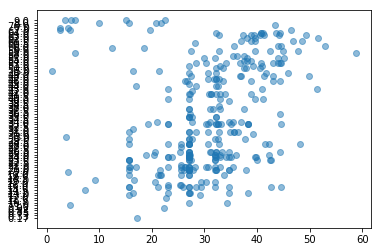

In [59]:
x = regr.predict(df_interpol.loc[:,input_list])
y = df_interpol.loc[:,['Age']]
#colors = np.random.rand(N)
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(x, y, alpha=0.5)
plt.show()

In [60]:
regr.score(df_interpol.loc[:,input_list], y)

0.47980775864481173

In [61]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Master,Miss,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,892,3,Mr,0,34.5,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,Mrs,1,47.0,1,0,7.0000,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,Mr,0,62.0,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,Mr,0,27.0,0,0,8.6625,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,Mrs,1,22.0,1,1,12.2875,0,0,0,0,0,0,0,0,0,0,0,1
5,897,3,Mr,0,14.0,0,0,9.2250,0,0,0,0,0,0,0,0,0,0,0,1
6,898,3,Miss,1,30.0,0,0,7.6292,0,1,0,0,0,0,0,0,0,0,1,0
7,899,2,Mr,0,26.0,1,1,29.0000,0,0,0,0,0,0,0,0,0,0,0,1
8,900,3,Mrs,1,18.0,0,0,7.2292,0,0,0,0,0,0,0,0,0,1,0,0
9,901,3,Mr,0,21.0,2,0,24.1500,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Fare           418
Master         418
Miss           418
Cabin_A        418
Cabin_B        418
Cabin_C        418
Cabin_D        418
Cabin_E        418
Cabin_F        418
Cabin_G        418
Emb_C          418
Emb_Q          418
Emb_S          418
dtype: int64

In [62]:
df_interpol

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Master,...,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,0,892,3,Mr,0,34.5,0,0,7.8292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,893,3,Mrs,1,47.0,1,0,7.0000,0,...,0,0,0,0,0,0,0,0,0,1
2,2,894,2,Mr,0,62.0,0,0,9.6875,0,...,0,0,0,0,0,0,0,0,1,0
3,3,895,3,Mr,0,27.0,0,0,8.6625,0,...,0,0,0,0,0,0,0,0,0,1
4,4,896,3,Mrs,1,22.0,1,1,12.2875,0,...,0,0,0,0,0,0,0,0,0,1
5,5,897,3,Mr,0,14.0,0,0,9.2250,0,...,0,0,0,0,0,0,0,0,0,1
6,6,898,3,Miss,1,30.0,0,0,7.6292,0,...,0,0,0,0,0,0,0,0,1,0
7,7,899,2,Mr,0,26.0,1,1,29.0000,0,...,0,0,0,0,0,0,0,0,0,1
8,8,900,3,Mrs,1,18.0,0,0,7.2292,0,...,0,0,0,0,0,0,0,1,0,0
9,9,901,3,Mr,0,21.0,2,0,24.1500,0,...,0,0,0,0,0,0,0,0,0,1


In [65]:
for i in range(0, 418):
    if df.loc[i,['Age']].isnull().Age:
        df.loc[i,['Age']] = regr.predict(df.loc[i,input_list].values.reshape(1, -1))[0][0]
df.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Fare           418
Master         418
Miss           418
Cabin_A        418
Cabin_B        418
Cabin_C        418
Cabin_D        418
Cabin_E        418
Cabin_F        418
Cabin_G        418
Emb_C          418
Emb_Q          418
Emb_S          418
dtype: int64

In [66]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Master,Miss,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Emb_C,Emb_Q,Emb_S
0,892,3,Mr,0,34.5,0,0,7.8292,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,Mrs,1,47.0,1,0,7.0000,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,Mr,0,62.0,0,0,9.6875,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,Mr,0,27.0,0,0,8.6625,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,Mrs,1,22.0,1,1,12.2875,0,0,0,0,0,0,0,0,0,0,0,1
5,897,3,Mr,0,14.0,0,0,9.2250,0,0,0,0,0,0,0,0,0,0,0,1
6,898,3,Miss,1,30.0,0,0,7.6292,0,1,0,0,0,0,0,0,0,0,1,0
7,899,2,Mr,0,26.0,1,1,29.0000,0,0,0,0,0,0,0,0,0,0,0,1
8,900,3,Mrs,1,18.0,0,0,7.2292,0,0,0,0,0,0,0,0,0,1,0,0
9,901,3,Mr,0,21.0,2,0,24.1500,0,0,0,0,0,0,0,0,0,0,0,1


In [67]:
df.to_csv('data/temp/test_ready.csv', index=False)